# Team Name: Data Scouts
### Team Members:
 
 -  Sai Harika Paluri                                                          
 -  Nikhil Kumar Mutyala                                              
 -  Sree Divya Keerthi Paravasthu Siddanthi                                     
 -  Ravi Theja Goalla   
 
 
#  Project Title: Price prediction in ride-hailing services based on weather conditions

## Project Description:
Uber and Lyft's ride prices are not constant like public transport. They are greatly affected by the demand and supply of rides at a given time. So what exactly drives this demand? The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home. Another guess would be the weather; rain/snow should cause more people to take rides.

The data is approx. for a week of Nov '18 ( I actually have included data collected while I was testing the 'querying' application so might have data spread out over more than a week. I didn't consider this as a time-series problem so did not worry about regular interval. The chosen interval was to query as much as data possible without unnecessary redundancy. So data can go from end week of Nov to few in Dec)
The Cab ride data covers various types of cabs for Uber & Lyft and their price for the given location. You can also find if there was any surge in the price during that time. Weather data contains weather attributes like temperature, rain, cloud, etc for all the locations taken into consideration.

#  DATA

## Source of Data

We have acquired this dataset from  kaggle https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices.

## Description of Data

The dataset contains 10 features along with the price for 693071 observations. Later we add few more derived features to this dataset.<br>The date is in timestamp format. So we change that timestamp into date format, the date attribute is added to the dataset and timestamp attribute is removed. Few attributes are added like hour, fare_per_mile. The description for the 10 features is given below:<br>

 <style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>Distance</td>
    <td>Distance between source and destination of the cab ride</td>
    </tr>
  <tr>
    <td>cab_type</td>
    <td>The type of uber car or lyft booked.</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>destination</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>source</td>
    <td>The source of a cab ride</td>
    </tr>
  <tr>
    <td>price</td>
    <td>Total estimated price of the cab ride.</td>
    </tr><tr>
    <td>name</td>
    <td>Name of the Uber/Lyft product</td>
    </tr>
    <tr>
    <td>Surge_multiplier</td>
    <td>This is the factor by which a normal cab fare is multiplied.If it is 1 it means that there is no surge.</td>
    </tr>
    <tr>
    <td>id</td>
    <td>Unique id per ride</td>
    </tr>
    <tr>
    <td>product_id</td>
    <td>Unique id of a particular product of Lyft or Uber. </td>
    </tr>
</table>

The other dataset we are merging with cabs_rides is weather_data.We have 8 features and 6276 entries in this.We use time_stamp feature to merge with the cab_rides data. 

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>temp</td>
    <td>Average temperature for a particular day</td>
    </tr>
  <tr>
    <td>location</td>
    <td>Aread in boston where the temperature was recorded.</td>
    </tr>
  <tr>
    <td>clouds</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>pressure</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>rain</td>
    <td>Amount of precipitation</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp in a day</td>
    </tr>
    <tr>
    <td>Humidity</td>
    <td>Humidity percentage in the climate.</td>
    </tr>
    <tr>
    <td>Wind</td>
    <td>Wind speed recorded for a particular day</td>
    </tr>
    </table>



# CRISM-DM PROCESS

## Importing the dataset

In [12]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [13]:
#Importing our dataset
df_cab=pd.read_csv('cab_rides.csv')
#Creating an index label for the dataset
df_cab.reset_index(drop=True, inplace=True)

 We need to identify the charecteristics of our dataset .For this we use three methods:-             
 info()-Used for identifying the different features and data types in a dataset.<br>
 shape()-We used this method to get an idea of  the rows and columns in a dataframe.<br>
 head()-We  used this method to examine the first few rows of the dataset<br>
 describe()-We used this method to identify the summary statistic's of all the features of the dataset.

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [4]:
df_cab.shape

(693071, 10)

In [5]:
df_cab = df_cab.iloc[0:10000, :]
df_cab.shape

(10000, 10)

In [6]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [7]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,10000.00000,1.000000e+04,9227.000000,10000.000000
mean,2.13824,1.544030e+12,16.324753,1.012875
std,1.12805,6.854128e+08,9.137386,0.089114
min,0.30000,1.543207e+12,2.500000,1.000000
25%,1.25000,1.543439e+12,9.000000,1.000000
50%,2.05000,1.543727e+12,13.500000,1.000000
75%,2.86000,1.544811e+12,22.500000,1.000000
max,7.46000,1.545161e+12,67.500000,2.500000


# DATA CLEANING  AND PREPROCCESSING

For data cleaning these were the steps that we followed:-<br>
1.We identified the null values in our dataset.<br>
2.We identified the count's of different features.<br>
3.We performed imputation of the null  price column using fare per pile.

In [8]:
df_cab.isnull().sum()

distance              0
cab_type              0
time_stamp            0
destination           0
source                0
price               773
surge_multiplier      0
id                    0
product_id            0
name                  0
dtype: int64

In [9]:
df_cab['cab_type'].value_counts()

Uber    5427
Lyft    4573
Name: cab_type, dtype: int64

In [10]:
df_cab['destination'].value_counts()

Northeastern University    971
North End                  958
Fenway                     889
North Station              849
Beacon Hill                837
West End                   824
Boston University          803
Back Bay                   790
Haymarket Square           788
South Station              786
Theatre District           763
Financial District         742
Name: destination, dtype: int64

In [11]:
df_cab['source'].value_counts()

North Station              954
Theatre District           920
Back Bay                   905
North End                  865
Fenway                     855
Financial District         844
Haymarket Square           842
West End                   807
South Station              797
Beacon Hill                765
Northeastern University    750
Boston University          696
Name: source, dtype: int64

In [12]:
df_cab['surge_multiplier'].value_counts()

1.00    9722
1.25     150
1.50      58
1.75      35
2.00      33
2.50       2
Name: surge_multiplier, dtype: int64

In [13]:
df_cab['name'].value_counts()

Black           781
UberPool        778
Black SUV       776
UberXL          775
UberX           774
Taxi            773
WAV             770
Shared          769
Lux Black XL    766
Lux             762
Lyft XL         762
Lyft            757
Lux Black       757
Name: name, dtype: int64

We noticed that the time_stamp  attribute is not in a proper format so we converted it into a proper format.We also introduced a new attribute called fare_per_mile .This value was obtained by dividing the cab price and distance covered per ride.

In [14]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['time'].dt.date
#extract hours only
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [15]:
#To check if cab data has changed.
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,25.00


In [16]:
#After conversion to a new column time we can delete the exisitng column
del df_cab['time_stamp']

We are using an imputation technique to replace the missing price values.We noticed that the missing values in the dataset are that of the type Uber-Taxi.The rate per mile in Boston for an UBER of the type 'TAXI'is a constant.The rate doesnt change irespective of the surge or weather conditions.Hence by multiplying the fare per mile and distance traveled in an Uber taxi,we were able to obtain the missing price.

In [21]:
#Replacing null values.
df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [22]:
#After replacement checking if the change is reflected in the dataset.
df_cab.price.isnull().sum()

0

# Visualizations for Data Preprocessing

Visualizations help us understand the dsitribution of the  data better.For this purpose we explored several graphs ranging from heatmaps to count plots and bar plots.

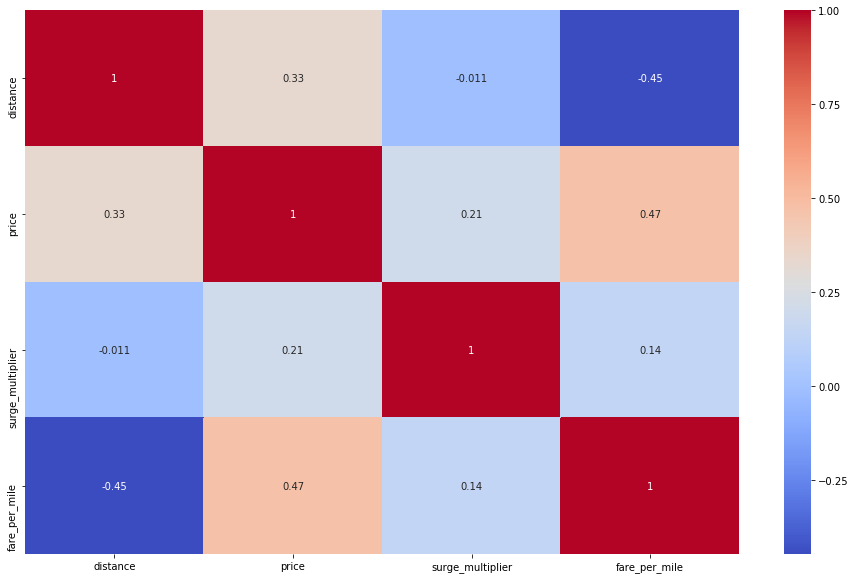

In [24]:
#Heatmap from searborn library
df_corr = df_cab.corr()
plt.figure( figsize = (16,10))
sns.heatmap(df_corr, cmap = 'coolwarm',annot = True)

This heatmap gave us an idea of the highly correlated variables.We observe that apart from the variable fare_per_mile .Distance and price have postive correlation whereas surge_multiper has positive correlation with price and negatve correlation with distance.

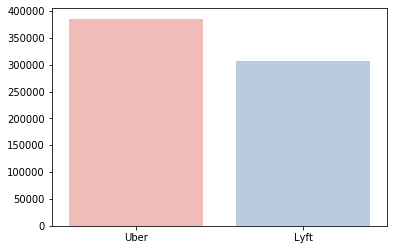

In [14]:
#Countplot  to display Uber Vs Lyft 
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette='Pastel1')

# Data preparation for Data preprocessing

We wanted to answer certain questions such as How does weather effect the surge? Does  it solely depend on weather only? and 
How each weather attribute effects surge?.This is when we realised that to answer these questions we need to merge our existing cab_rides dataset with weather data for each day in Boston.We used the time_stamp attribute as the common attribute between the two datasets.<br>
<b>NOTE:- </b><I>We use date to join both our data sets.As weather is recorded for an average day.</I>

In [10]:
#Import the new dataset and view the attributes
df_weather=pd.read_csv('weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [11]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['time']= pd.to_datetime(df_weather['time_stamp'], unit='s')
df_weather['date']=df_weather['time'].dt.date


In [28]:
#Here we merge based on the date in each dataset.
df_merged= pd.merge(df_cab,df_weather, right_on='date',left_on='date',how='left')

In our newly formed merged dataset we perform info(),describe() and shape() to understand the data.

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686132 entries, 0 to 4686131
Data columns (total 21 columns):
distance            float64
cab_type            object
destination         object
source              object
price               float64
surge_multiplier    float64
id                  object
product_id          object
name                object
time_x              datetime64[ns]
date                object
fare_per_mile       float64
temp                float64
location            object
clouds              float64
pressure            float64
rain                float64
time_stamp          int64
humidity            float64
wind                float64
time_y              datetime64[ns]
dtypes: datetime64[ns](2), float64(10), int64(1), object(8)
memory usage: 786.6+ MB


In [ ]:
df_merged.shape

# Transformations in Data Preprocessing

In this specific stage we are getting our data ready inorder to apply machine learning models.We first need to split our data into train and test set so that we can apply changes to only the relevant features.Here price is the target variable and the other features excluding time are predictor variables.

In [ ]:
#Importing neccessary modules from sklearn
from sklearn.model_selection import train_test_split
df_merged['rain'].fillna(0,inplace=True)
#Since price is the target variable
df_X1 = df_merged.loc[:, df_merged.columns != 'price']
df_X2 = df_X1.loc[:, df_X1.columns != 'time_x']
df_X = df_X2.loc[:, df_X2.columns != 'time_y']
df_y = df_merged[['price']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
print(X_train.count())
print(X_test.count())

### Standardization
We want to apply standardization on our variables before fitting it into a model and performing prediction.The method we chose is StandarScalar.We need to make sure that the categorical variables are encoded.We use nominal encoder method for that purpose.

In [ ]:
#Performing ordinal encoding
x_norm_train = pd.get_dummies(X_train)
x_norm_test = pd.get_dummies(X_test)

In [ ]:
x_norm_train.info()

In [ ]:
#Performing normalization on all the variables in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_norm_train)
x_std_train = scaler.transform(x_norm_train)
x_std_test = scaler.transform(x_norm_test)

In [ ]:
#Printing mean and standard deviation for observation purpose
print('Mean:',np.mean(x_std_train))
print('Standard Deviation',np.std(x_std_train))
print('Mean:',np.mean(x_std_test))
print('Standard Deviation',np.std(x_std_test))

In [ ]:
#Creation of a dataframe from the normalized values in test and train.
df_x_std_train = pd.DataFrame(x_std_train, columns=x_norm_train.columns)
df_x_std_test = pd.DataFrame(x_std_test, columns=x_norm_test.columns)

### Principal Component Analysis
Principal component analysis is a tool used for dimensionality reduction.Since we have a a lot of variables it will be an aid to figure out the most important ones.It is always more useful to identify the data interms of its principal compoennets rather than a normal x-y-line.The directions where there are most variance and the directions where data is most spread out usually turn out to be the principal components.

In [ ]:
#import neccessary pca librariers
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
#Fitting the normalized train data set to a pc model
pca.fit(df_x_std_train)

In [ ]:
#Gives us the principal components of the dataset.
pca.n_components_

In [ ]:
#Using pca transforming our existing train and test data set
df_x_std_train = pca.transform(df_x_std_train)
df_x_std_test = pca.transform(df_x_std_test)

# Modelling
For this dataset we have decided to use ensemble methods such as RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(df_x_std_train, y_train.values.ravel())

In [ ]:
predictions = rf.predict(df_x_std_test[0].reshape(1,-1))
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
mape = 100 * (errors / y_test)
from sklearn.model_selection import cross_validate
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')